In [2]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import time
def kfilter(array):
  if type(array)==str:
        array=eval(array)
  measurements = np.array(array)
  kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=measurements[0],
                  initial_state_covariance=1,
                  observation_covariance=100,
                  transition_covariance=1) 
  state_means, state_covariances = kf.filter(measurements) 
  return state_means

In [3]:
import pandas as pd
import os
df = pd.read_csv('dataset_train.csv',sep=';')
def dfdel(value):
    return len(eval(value))
print(len(df))
df = df[df['Data'].map(dfdel)== 240]
print(len(df))

31383
31382


In [4]:
df.head()

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[298, 296, 2, -455, -703, -596, -262, -44, 28,...","[-918, -1078, -450, 640, 1503, 1635, 1083, 589...",1
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ...",0
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[-369, -543, -644, -670, -636, -586, -524, -44...","[263, 444, 548, 576, 539, 485, 419, 331, 266, ...",2
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10...",1
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2


In [5]:
names = df['Filename'].unique()

In [6]:
import matplotlib.pyplot as plt
plt.plot(eval(d1[d1['Test_index']==0].iloc[0]['Data']))

NameError: name 'd1' is not defined

In [ ]:
array = eval(d1[d1['Test_index']==0].iloc[0]['Data'])
plt.plot(kfilter(array))

In [ ]:
class0 = df[df['Class_label']==0]
class1 = df[df['Class_label']==1]
class2 = df[df['Class_label']==2]

# Эксперимент со среднеквадратичным отклонением

In [ ]:
def getStd(df):
    std = []
    for i in range(len(df)):
        std.append(np.std(list(eval(df.iloc[i]['Data']))))
    std = np.array(std)
    hist = np.histogram(std, bins = 50)[0]
    plt.bar(np.linspace(std.min(), std.max()), hist)
    plt.show()

In [ ]:
getStd(class0)

In [ ]:
getStd(class1)

In [ ]:
getStd(class2)

# Кластеризация

In [ ]:
def getKfilterArray(df):
    kfplot0 = []
    for i in range(len(df)):
     try:
        kf = kfilter(df.iloc[i]['Data'])
        if i%1000 == 0:
            print(str(i)+'/'+str(len(df)))
        if len(kf)==240:
          kfplot0.append(kf)
     except:
        True
    return kfplot0

In [ ]:
kfplot0 = getKfilterArray(df)

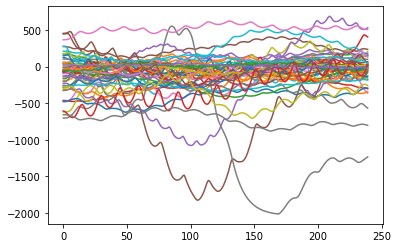

In [93]:
for i in kfplot0[250:300]:
    plt.plot(i)
plt.show()

In [94]:
len(kfplot0)
kf = kfilter(class0.iloc[0]['Data'])

In [95]:
for i in range(len(kfplot0)):
    kfplot0[i]=kfplot0[i].tolist()
    for j in range(len(kfplot0[i])):
        kfplot0[i][j]=kfplot0[i][j][0]

In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
#tickers_scaled = scaler.fit_transform(kfplot0)  #с предобработкой данных
tickers_scaled = kfplot0 #без предобработки данных

# Поиск оптимальных кластеров

  0%|          | 0/9 [00:00<?, ?it/s]

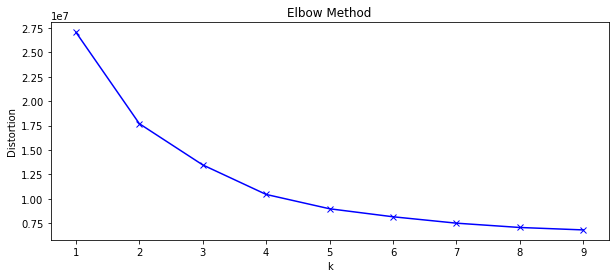

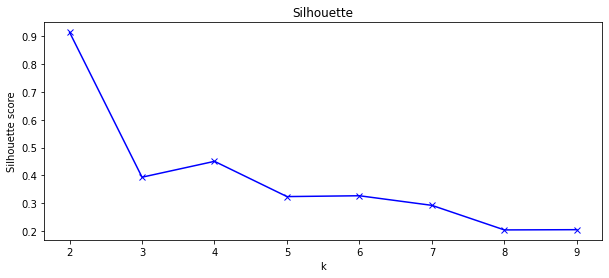

In [113]:
from tqdm.autonotebook import tqdm
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
distortions = []
silhouette = []
K = range(1, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

#  Для 2 разных типов людей

In [114]:
n_clusters = 2
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=3, max_iter=10)
ts_kmeans.fit(tickers_scaled)

TimeSeriesKMeans(max_iter=10, n_clusters=2, n_jobs=3)

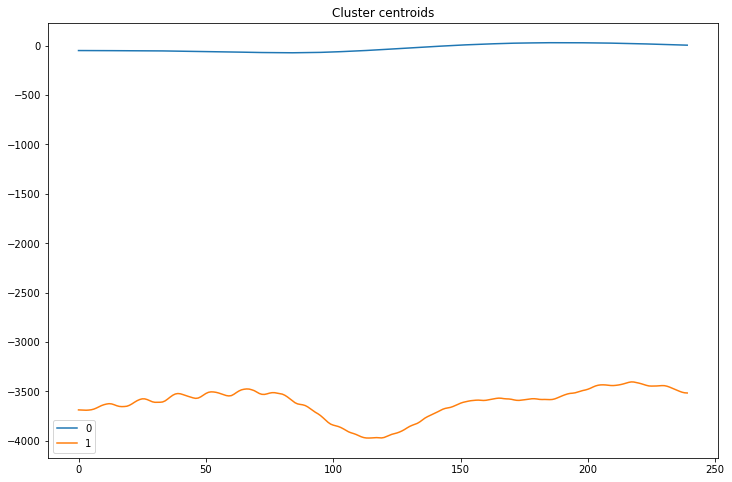

In [115]:
plt.figure(figsize=(12,8))
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

# Для разных людей и 3 состояний

In [116]:
n_clusters = 6
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=3, max_iter=10)
ts_kmeans.fit(tickers_scaled)

TimeSeriesKMeans(max_iter=10, n_clusters=6, n_jobs=3)

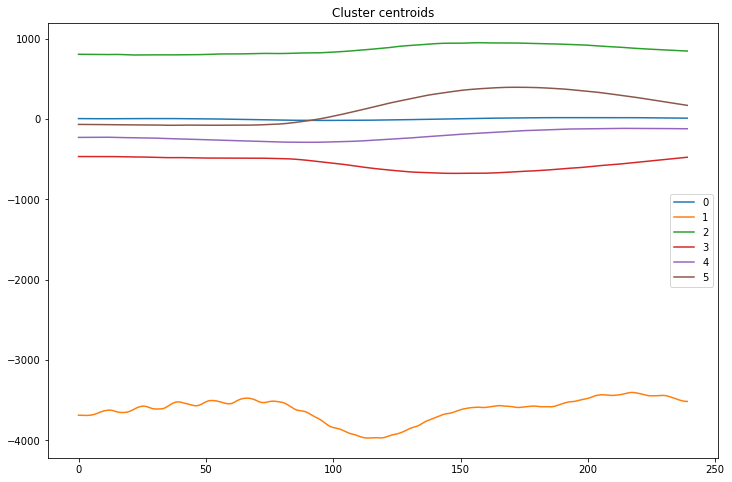

In [117]:
plt.figure(figsize=(12,8))
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [ ]:
kfplot1 = []
for i in range(len(class1)):
    kf = kfilter(class1.iloc[i]['Data'])
    if i%1000 == 0:
        print(str(i)+'/'+str(len(class1)))
    kfplot1.append(kf)


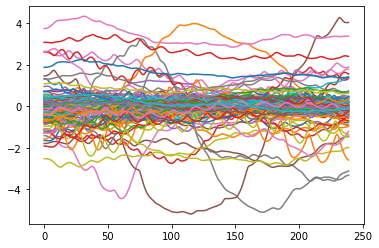

In [64]:
for i in tickers_scaled:
    plt.plot(i)
plt.show()

# Второй кластер среднее волнение общий вид

In [1]:
for i in kfplot1:
    plt.plot(i)
plt.show()

NameError: name 'kfplot1' is not defined

# Третий кластер волнение общий вид

In [16]:
kfplot2 = []
for i in range(len(class2)):
    kf = kfilter(class2.iloc[i]['Data'])
    if i%1000 == 0:
        print(str(i)+'/'+str(len(class2)))
    kfplot2.append(kf)

0/650


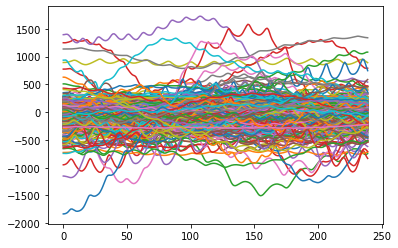

In [17]:
for i in kfplot2[:500]:
    plt.plot(i)
plt.show()

# Индивидаульная модель

In [19]:
d1 = df[df['Filename']==names[0]]
pres=d1['Presentation'].unique()

In [20]:
pdf = []
for j in pres:
    test = d1[d1['Presentation']==j]['Presentation'].unique()
    for i in test:
        d1 = d1[d1['Presentation']==j]
        pdf.append(d1[d1['Test_index']==i])

In [21]:
for j in pdf:
    class0 = j[j['Class_label']==0]
    class1 = j[j['Class_label']==1]
    class2 = j[j['Class_label']==2]

In [22]:
for i in range(len(class0)):
    plt.plot(kfilter(class0.iloc[i]['Data_2']))
plt.show()

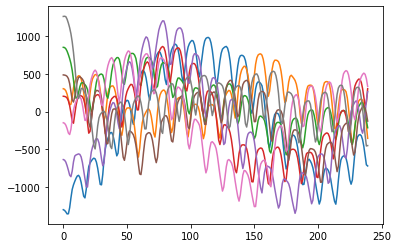

In [23]:
for i in range(len(class1)):
    plt.plot(kfilter(class1.iloc[i]['Data_2']))
plt.show()

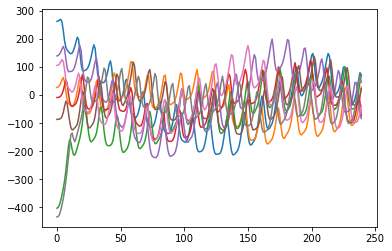

In [24]:
for i in range(len(class1)):
    plt.plot(kfilter(class1.iloc[i]['Data']))
plt.show()

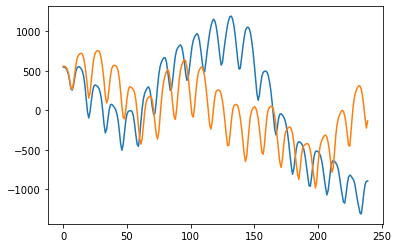

In [25]:
for i in range(len(class2)):
    plt.plot(kfilter(class2.iloc[i]['Data_2']))
plt.show()